In [15]:
using TVC, Revise

In [16]:
# veh = RocketParameters(MomentArm = t -> [0; 0; -0.4]); # The parameters of the rocket
# atmos = Atmosphere(g = h -> [0; 0; -9.80655]);
veh = RocketParameters()
atmos = Atmosphere()
traj = RocketTrajectoryParameters()

mdl = RocketProblem(veh, atmos, traj)

RocketProblem
  veh: RocketParameters{Float64, Diagonal{Float64, Vector{Float64}}}
  atmos: Atmosphere
  traj: RocketTrajectoryParameters{Float64}


In [17]:
sol = solveProblem(mdl);

k  | status   | vd    | vs    | vbc   | J         | ΔJ %      | Δx    | Δu    | Δp    | δ     | dyn | ηx    | ηu    | ηp   
---+----------+-------+-------+-------+-----------+-----------+-------+-------+-------+-------+-----+-------+-------+------
1  | ALMOST_O | 1e-01 | 0e+00 | 7e-09 | 9.26e+00  |           | 8e-02 | 4e-01 | 2e-01 | 2e-01 | T   | 0.12  | 0.41  | 0.16 


2  | ALMOST_O | 5e-04 | 0e+00 | 2e-09 | 3.59e-01  | 96.13     | 1e-02 | 3e-01 | 3e-02 | 4e-02 | T   | 0.02  | 0.30  | 0.03 


3  | ALMOST_O | 3e-04 | 0e+00 | 1e-08 | 2.82e-01  | 21.45     | 8e-03 | 3e-01 | 7e-04 | 9e-03 | T   | 0.06  | 0.28  | 0.00 


4  | ALMOST_O | 9e-06 | 0e+00 | 4e-08 | 2.80e-01  | 0.67      | 2e-03 | 2e-01 | 4e-05 | 2e-03 | T   | 0.08  | 0.23  | 0.00 


5  | ALMOST_O | 4e-06 | 0e+00 | 2e-08 | 2.79e-01  | 0.36      | 1e-03 | 2e-01 | 3e-05 | 1e-03 | T   | 0.03  | 0.19  | 0.00 


6  | ALMOST_O | 6e-07 | 0e+00 | 3e-09 | 2.78e-01  | 0.13      | 4e-04 | 8e-02 | 1e-05 | 4e-04 | T   | 0.01  | 0.08  | 0.00 


7  | ALMOST_O | 4e-06 | 0e+00 | 6e-09 | 2.81e-01  | -0.94     | 3e-04 | 6e-02 | 6e-06 | 3e-04 | T   | 0.22  | 0.07  | 0.00 


8  | ALMOST_O | 5e-07 | 0e+00 | 3e-09 | 2.79e-01  | 0.87      | 4e-05 | 6e-03 | 2e-07 | 4e-05 | T   | 0.03  | 0.01  | 0.00 


9  | ALMOST_O | 4e-06 | 0e+00 | 6e-09 | 2.81e-01  | -0.86     | 2e-04 | 3e-02 | 4e-07 | 2e-04 | T   | 0.22  | 0.05  | 0.00 


10 | ALMOST_O | 3e-06 | 0e+00 | 6e-09 | 2.81e-01  | 0.13      | 1e-04 | 2e-02 | 5e-07 | 1e-04 | T   | 0.19  | 0.04  | 0.00 


11 | ALMOST_O | 7e-07 | 0e+00 | 3e-09 | 2.79e-01  | 0.66      | 3e-05 | 6e-03 | 2e-07 | 3e-05 | T   | 0.05  | 0.01  | 0.00 


12 | ALMOST_O | 2e-06 | 0e+00 | 5e-09 | 2.80e-01  | -0.35     | 5e-05 | 1e-02 | 2e-07 | 5e-05 | T   | 0.13  | 0.03  | 0.00 


13 | ALMOST_O | 2e-07 | 0e+00 | 3e-09 | 2.78e-01  | 0.49      | 3e-05 | 2e-03 | 1e-07 | 3e-05 | T   | 0.01  | 0.00  | 0.00 


14 | ALMOST_O | 1e-07 | 0e+00 | 2e-09 | 2.78e-01  | 0.02      | 3e-05 | 1e-03 | 1e-07 | 3e-05 | T   | 0.01  | 0.00  | 0.00 


Coast time (s): 1.324452938792038
Impact Velocity Magnitude (m/s): 0.5275451779876535
True Impact Velocity Magnitude (m/s): 0.527379129190815


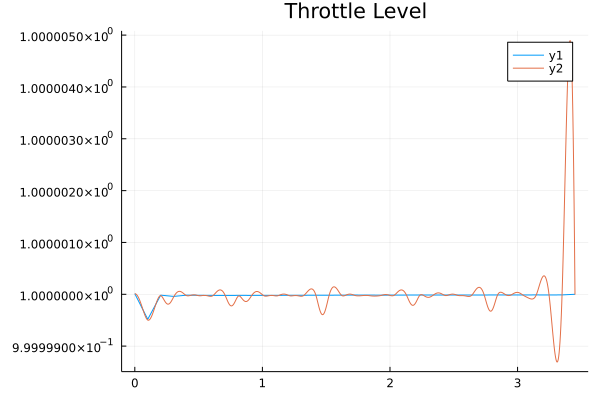

In [18]:
printSolution(sol)
plotThrottle(sol)

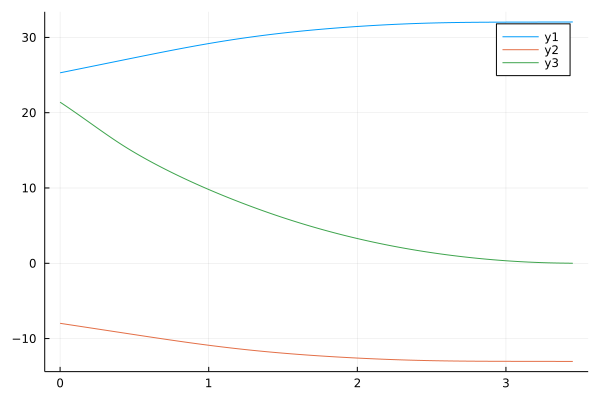

In [19]:
using LinearAlgebra, SCPToolbox, Plots

t = LinRange(0, 1, 1000)
r = mapreduce(k -> sample(sol.xc, k)[veh.id_r], hcat, t)
Plots.plot(motorTime.(t, Ref(mdl)), r')

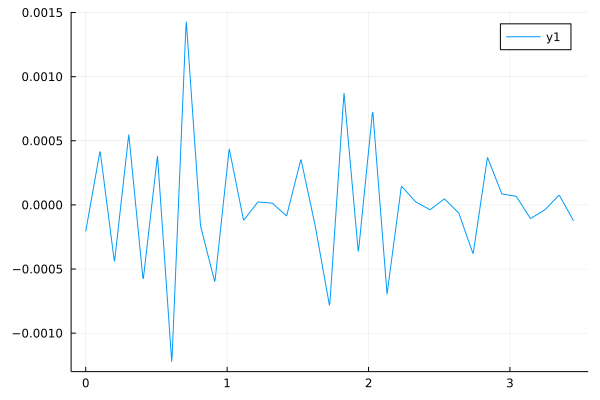

In [20]:
r = mapreduce(k -> sample(sol.uc, k)[veh.id_roll], hcat, t)
Plots.plot(motorTime.(t, Ref(mdl)), r')

In [21]:
sol.xd

19×35 Matrix{Float64}:
  25.2978        25.7037        26.1096       …   32.043         32.0475
  -7.97336       -8.27777       -8.58222         -13.0326       -13.036
  21.3988        20.0386        18.627             0.0322738     -2.89051e-9
   4.0            4.00009        4.00131           0.0427351      0.0447898
  -3.0           -3.00007       -3.00098          -0.0320523     -0.0335863
 -12.9883       -13.7402       -13.9968       …   -0.361997      -0.524474
   1.0            1.0            0.999993          1.0            0.999999
  -1.10309e-10   -3.45944e-6    -0.000110257      -0.000115358   -3.95719e-11
   3.34908e-11   -4.54977e-6    -0.000144798      -0.00015436     5.88629e-11
   1.64313e-14    4.48021e-5     0.0036931         0.000661414    0.00125255
  -2.29312e-10   -0.00034092    -0.00544086   …    0.00819005     5.93019e-11
  -1.81366e-11   -0.000448458   -0.00711431        0.0109401     -8.36664e-11
   1.77636e-15    0.0446512      0.0397707         0.00958046   